<a href="https://colab.research.google.com/github/na-learning/Stock-Prediction/blob/main/Stock_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install yfinance
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

--2024-07-18 16:18:20--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-07-18 16:18:20--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-07-18 16:18:20--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

In [52]:
import yfinance as yf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import talib as ta
import numpy as np

df = yf.Ticker('TSLA').history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-12 00:00:00-04:00,235.800003,251.839996,233.089996,248.229996,155694400,0.0,0.0
2024-07-15 00:00:00-04:00,255.970001,265.600006,251.729996,252.639999,146912900,0.0,0.0
2024-07-16 00:00:00-04:00,255.309998,258.619995,245.800003,256.559998,126332500,0.0,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3537 entries, 2010-06-29 00:00:00-04:00 to 2024-07-18 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3537 non-null   float64
 1   High          3537 non-null   float64
 2   Low           3537 non-null   float64
 3   Close         3537 non-null   float64
 4   Volume        3537 non-null   int64  
 5   Dividends     3537 non-null   float64
 6   Stock Splits  3537 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 221.1 KB


In [54]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [55]:
df = df.drop(columns=['Dividends','Stock Splits'])

In [56]:
import pandas as pd
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...,...
3532,2024-07-12 00:00:00-04:00,235.800003,251.839996,233.089996,248.229996,155694400
3533,2024-07-15 00:00:00-04:00,255.970001,265.600006,251.729996,252.639999,146912900
3534,2024-07-16 00:00:00-04:00,255.309998,258.619995,245.800003,256.559998,126332500
3535,2024-07-17 00:00:00-04:00,252.729996,258.470001,246.179993,248.500000,115356000


In [59]:
# df['Close'] = df["Close"].shift(1).values
# df.dropna()
# defining x and y
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['High-Low'] = df['High'].shift(1) - df['Low'].shift(1)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Close-1'] = df['Open'].shift(1) - df['Close'].shift(1)
df["Date"] = df["Date"].dt.date
df = df.dropna()
X = df.iloc[:,:12]
X = df[['Open', 'High', 'Low', 'Volume', 'S_10', 'Corr', 'RSI', 'High-Low', 'Open-Close', 'Open-Close-1']]
y = df['Close']

In [60]:
df.describe()

,Open,High,Low,Close,Volume,S_10,Corr,RSI,High-Low,Open-Close,Open-Close-1
count,3519.000000,3519.000000,3519.000000,3519.000000,3.519000e+03,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000
mean,75.526390,77.181884,73.765599,75.514447,9.702953e+07,75.193492,0.358770,53.008374,3.413893,0.083661,0.012674
std,102.494377,104.772723,100.017983,102.430017,7.875945e+07,102.084155,0.509693,15.178257,5.510195,2.666805,4.052331
min,1.186667,1.193333,1.159333,1.173333,1.777500e+06,1.246933,-0.970722,10.928162,0.016667,-24.100006,-33.460007
25%,11.787667,12.059000,11.526000,11.855333,4.771050e+07,11.779000,-0.035495,42.257573,0.289667,-0.096000,-0.284667
50%,17.481333,17.702667,17.172001,17.468000,8.243970e+07,17.529733,0.502273,52.453634,0.601999,0.010666,0.000000
75%,160.594994,165.089996,157.415001,161.074997,1.230548e+08,160.751500,0.806895,63.550063,5.301327,0.179000,0.280333
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,383.062668,0.997537,96.146499,54.326660,32.510010,50.033356


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False, random_state=3)

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("regression coefficient",lr.coef_)
print("regression intercept",lr.intercept_)

regression coefficient [-6.09429931e-01  7.87976583e-01  7.92632657e-01  2.53761456e-11
  3.21458076e-02 -5.33804292e-03  1.70457901e-03 -5.92976369e-02
  1.39206928e-01  7.85582030e-02]
regression intercept -0.09305995652741039


In [63]:
lr_confidence = lr.score(X_test, y_test)
print("linear regression confidence: ", lr_confidence)

linear regression confidence:  0.9980251874295077


In [66]:
predicted=lr.predict(X_test)
print(X_test.head())

           Open       High        Low     Volume       S_10      Corr  \
2481  51.813999  53.093334  51.490002  172915500  51.125000  0.358215   
2482  52.917999  54.933334  52.467335  241297500  51.753466  0.349610   
2483  52.700668  54.933334  52.333332  247794000  51.837066  0.638437   
2484  55.133331  56.219334  53.866669  238603500  52.105666  0.696050   
2485  54.722000  55.066666  50.886665  285982500  52.041999  0.797477   

            RSI  High-Low  Open-Close  Open-Close-1  
2481  59.773289  1.912666   -0.358002     -0.405334  
2482  64.753845  1.603333    0.915333     -0.188667  
2483  62.965551  2.466000   -1.927330     -1.709999  
2484  62.521917  2.600002    1.047333     -1.385330  
2485  58.061156  2.352665    0.761333      1.172665  


In [67]:
dfr=pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
2481,52.002666,52.531622
2482,54.627998,54.326449
2483,54.085999,53.784559
2484,53.960667,54.969721
2485,52.730667,52.116891
2486,53.555332,52.377572
2487,53.278000,53.050422
2488,54.242001,54.565188
2489,53.867332,54.355192
2490,54.370667,54.780477


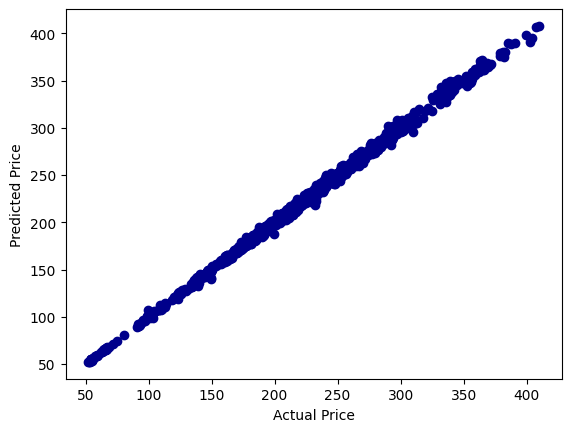

In [71]:
import matplotlib.pyplot as plt

plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

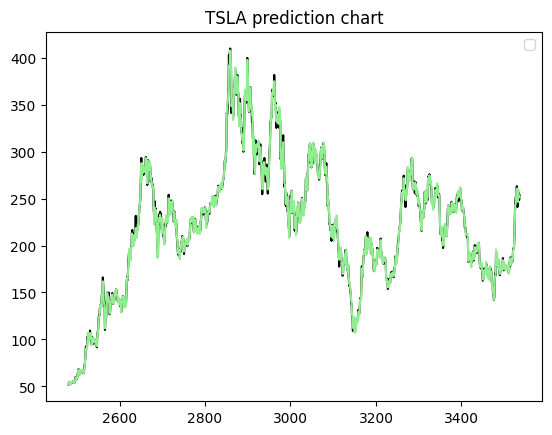

In [72]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightgreen')
plt.title("TSLA prediction chart")
plt.legend()